In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('new_data.csv')

stops = {
    'VSKP': ['Temperature_1', 'Wind_Speed_1', 'Distance_travelled_1'],
    'ANV': ['Temperature_7', 'Wind_Speed_7', 'Distance_travelled_7']
}

stop_data = {}
for stop, features in stops.items():
    stop_data[stop] = df[features]

centroids = {stop: stop_data[stop].mean(axis=0) for stop in stops}

spreads = {stop: stop_data[stop].std(axis=0) for stop in stops}

print("Centroids:")
for stop, centroid in centroids.items():
    print(f"{stop}: {centroid}")

print("\nSpreads:")
for stop, spread in spreads.items():
    print(f"{stop}: {spread}")

distance = np.linalg.norm(centroids['VSKP'] - centroids['ANV'])
print(f"\nEuclidean distance between 'VSKP' and 'ANV' centroids: {distance:.2f}")

Centroids:
VSKP: Temperature_1           28.422192
Wind_Speed_1             2.066301
Distance_travelled_1     0.000000
dtype: float64
ANV: Temperature_7            29.038904
Wind_Speed_7              1.995068
Distance_travelled_7    114.000000
dtype: float64

Spreads:
VSKP: Temperature_1           2.228888
Wind_Speed_1            0.840584
Distance_travelled_1    0.000000
dtype: float64
ANV: Temperature_7           2.495704
Wind_Speed_7            0.834410
Distance_travelled_7    0.000000
dtype: float64

Euclidean distance between 'VSKP' and 'ANV' centroids: nan


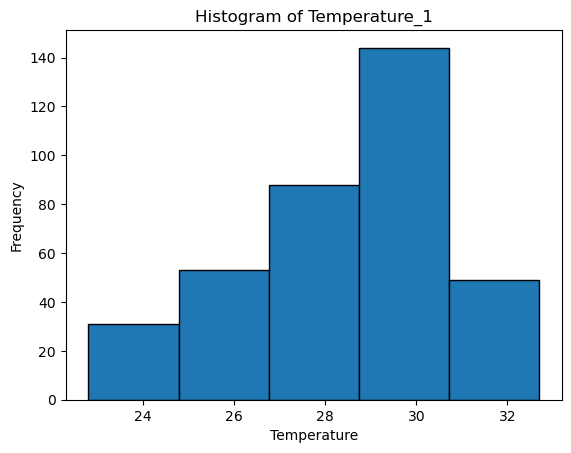

Mean of Temperature_1: 28.42
Variance of Temperature_1: 4.97


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

feature_data = df['Temperature_1']

plt.hist(feature_data, bins=5, edgecolor='black')
plt.title('Histogram of Temperature_1')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

mean = feature_data.mean()
variance = feature_data.var()

print(f"Mean of Temperature_1: {mean:.2f}")
print(f"Variance of Temperature_1: {variance:.2f}")


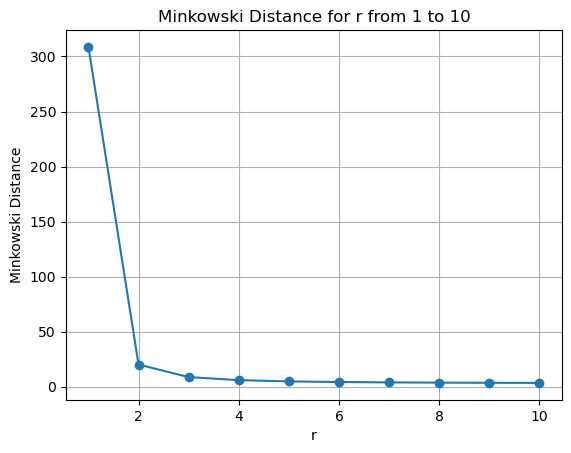

In [5]:
from scipy.spatial.distance import minkowski

vector1 = df['Temperature_1']
vector2 = df['Temperature_7']

r_values = range(1, 11)
distances = [minkowski(vector1, vector2, r) for r in r_values]

# Plot the Minkowski distance
plt.plot(r_values, distances, marker='o')
plt.title('Minkowski Distance for r from 1 to 10')
plt.xlabel('r')
plt.ylabel('Minkowski Distance')
plt.grid(True)
plt.show()


In [9]:
from sklearn.model_selection import train_test_split

X = df[['Temperature_7', 'Wind_Speed_7']]
y = df['ANV'].apply(lambda x: 1 if x > 5 else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train:")
print(X_train)
print("\nX_test:")
print(X_test)
print("\ny_train:")
print(y_train)
print("\ny_test:")
print(y_test)

X_train:
     Temperature_7  Wind_Speed_7
268           33.1           1.5
231           29.7           1.3
157           24.9           1.3
19            29.7           2.8
147           25.3           1.6
..             ...           ...
71            30.9           1.3
106           27.1           4.2
270           32.7           1.3
348           26.0           0.8
102           29.0           1.3

[255 rows x 2 columns]

X_test:
     Temperature_7  Wind_Speed_7
193           25.2           1.2
33            29.4           2.9
15            31.1           1.7
309           31.0           1.8
57            29.1           1.6
..             ...           ...
158           26.0           1.1
229           28.3           1.3
360           30.8           3.1
209           29.0           1.2
328           29.3           3.4

[110 rows x 2 columns]

y_train:
268    1
231    1
157    1
19     1
147    1
      ..
71     1
106    1
270    1
348    1
102    0
Name: ANV, Length: 255, dtype: in

In [11]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)

neigh.fit(X_train, y_train)

print("kNN Classifier trained successfully.")

kNN Classifier trained successfully.


In [13]:
accuracy = neigh.score(X_test, y_test)

print(f"Accuracy of the kNN classifier on the test set: {accuracy:.2f}")

Accuracy of the kNN classifier on the test set: 0.86


In [15]:
predictions = neigh.predict(X_test)

print("Predicted class labels for the test set:")
print(predictions)

Predicted class labels for the test set:
[1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1]


k = 1: Accuracy = 0.85
k = 2: Accuracy = 0.73
k = 3: Accuracy = 0.86
k = 4: Accuracy = 0.86
k = 5: Accuracy = 0.89
k = 6: Accuracy = 0.89
k = 7: Accuracy = 0.89
k = 8: Accuracy = 0.89
k = 9: Accuracy = 0.89
k = 10: Accuracy = 0.89
k = 11: Accuracy = 0.89


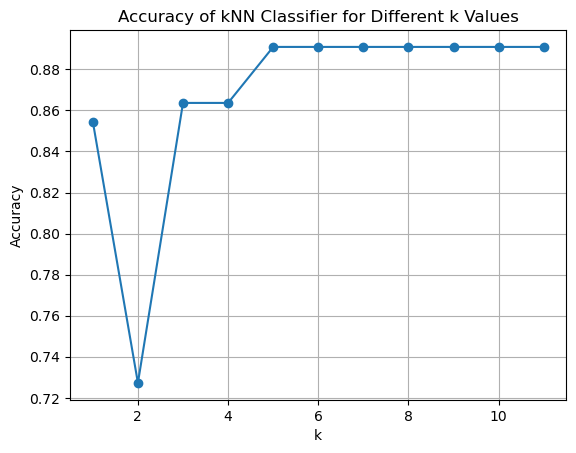

In [17]:
import matplotlib.pyplot as plt
accuracy_scores = []

for k in range(1, 12):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    accuracy = neigh.score(X_test, y_test)
    accuracy_scores.append(accuracy)
    
    print(f"k = {k}: Accuracy = {accuracy:.2f}")
plt.plot(range(1, 12), accuracy_scores, marker='o')
plt.title('Accuracy of kNN Classifier for Different k Values')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [25]:
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(y_test, predictions)

print("Confusion Matrix for the test set:")
print(conf_matrix)

print("\nClassification Report for the test set:")
print(classification_report(y_test, predictions))

train_predictions = neigh.predict(X_train)

conf_matrix_train = confusion_matrix(y_train, train_predictions)
print("\nConfusion Matrix for the training set:")
print(conf_matrix_train)

print("\nClassification Report for the training set:")
print(classification_report(y_train, train_predictions))

Confusion Matrix for the test set:
[[ 0 12]
 [ 3 95]]

Classification Report for the test set:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.89      0.97      0.93        98

    accuracy                           0.86       110
   macro avg       0.44      0.48      0.46       110
weighted avg       0.79      0.86      0.83       110


Confusion Matrix for the training set:
[[  0  21]
 [  0 234]]

Classification Report for the training set:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.92      1.00      0.96       234

    accuracy                           0.92       255
   macro avg       0.46      0.50      0.48       255
weighted avg       0.84      0.92      0.88       255



C:\Users\sheet\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sheet\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sheet\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [23]:
import numpy as np
import pandas as pd

df = pd.read_csv('new_data.csv')

stops = {
    'VSKP': ['Temperature_1', 'Wind_Speed_1', 'Distance_travelled_1'],
    'NDD': ['Temperature_12', 'Wind_Speed_12', 'Distance_travelled_12']
}

stop_data = {}
for stop, features in stops.items():
    stop_data[stop] = df[features]
print(stop_data)
centroids = {stop: stop_data[stop].mean(axis=0) for stop in stops}

spreads = {stop: stop_data[stop].std(axis=0) for stop in stops}

print("Centroids:")
for stop, centroid in centroids.items():
    print(f"{stop}: {centroid}")

print("\nSpreads:")
for stop, spread in spreads.items():
    print(f"{stop}: {spread}")

distance = np.linalg.norm(centroids['VSKP'] - centroids['NDD'])
print(f"\nEuclidean distance between 'VSKP' and 'ANV' centroids: {distance:.2f}")

{'VSKP':      Temperature_1  Wind_Speed_1  Distance_travelled_1
0             30.2           2.8                     0
1             31.2           2.1                     0
2             30.5           2.4                     0
3             30.5           2.3                     0
4             30.2           2.3                     0
..             ...           ...                   ...
360           29.8           2.0                     0
361           30.0           2.8                     0
362           28.6           2.6                     0
363           28.3           2.1                     0
364           29.6           2.5                     0

[365 rows x 3 columns], 'NDD':      Temperature_12  Wind_Speed_12  Distance_travelled_12
0              31.2            3.7                    224
1              31.2            3.8                    224
2              31.5            3.5                    224
3              30.9            2.7                    224
4        